In [1]:
import gc
import pandas as pd
import numpy as np
from datetime import datetime

from xgboost import XGBClassifier
from sklift.models import ClassTransformation

from sklift.metrics import uplift_at_k
import matplotlib.pyplot as plt
import catboost as cb
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import optuna
import pandas as pd
from pandas import read_csv

%matplotlib inline

In [12]:
data_0 = read_csv('answer9.csv')
data_0.head()

,CardHolder;uplift
0,16400802;-0.5594273
1,15752880;-1.2212579
2,15978290;-1.1612471
3,16604118;-0.9950716
4,15880709;-1.0263612


In [17]:
data_0 = read_csv('answer9.csv', sep=';')
data_1 = read_csv('answer11.csv', sep=';')
data_1['uplift'] = data_1['uplift'] * 4 + data_0['uplift']

answer = data_1.reset_index(drop=True)
answer.to_csv('answer20.csv', index=False, sep=';')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [4]:
import azureml.core
from azureml.core.authentication import InteractiveLoginAuthentication
from azureml.core import Experiment, Workspace

# Check core SDK version number
print("You are currently using version", azureml.core.VERSION, "of the Azure ML SDK")
print("")

# Log In to Azure ML Workspace
interactive_auth = InteractiveLoginAuthentication(tenant_id="76f90eb1-fb9a-4446-9875-4d323d6455ad")

ws = Workspace.from_config(auth=interactive_auth)
print('Workspace name: ' + ws.name, sep='\n')

You are currently using version 1.5.0 of the Azure ML SDK

Workspace name: team19


In [5]:
def custom_metric(answers, take_top_ratio=0.25):
    answers.sort_values(by='uplift', inplace=True, ascending=False)
    
    n_samples = int(np.ceil(answers.shape[0] * take_top_ratio))
    answers = answers.iloc[:n_samples, :]
    answers_test = answers[answers['group'] == 1]['response_att'].sum() / \
                   answers[answers['group'] == 1].shape[0]
    answers_control = answers[answers['group'] == 0]['response_att'].sum() / \
                      answers[answers['group'] == 0].shape[0]
    return (answers_test - answers_control) * 100

In [6]:
# Get an experiment object from Azure Machine Learning

In [7]:
#i = 0

lr 0.17
depth 3
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.449017392125747


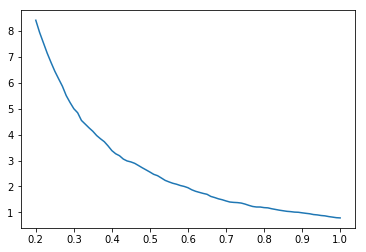

lr 0.18000000000000002
depth 3
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.399787767591134


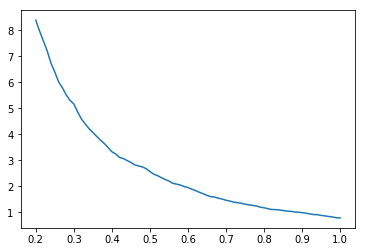

lr 0.19000000000000003
depth 3
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.443276651383586


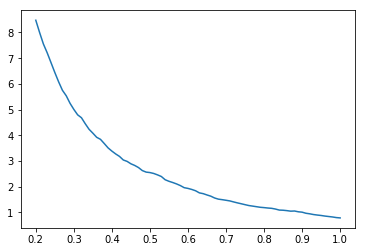

lr 0.20000000000000004
depth 3
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.367772174511716


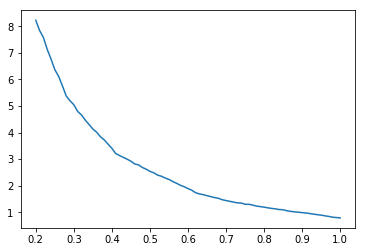

lr 0.21000000000000005
depth 3
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.435269737610766


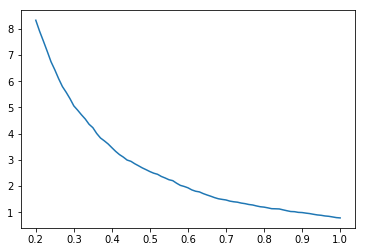

lr 0.22000000000000006
depth 3
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.52383869686346


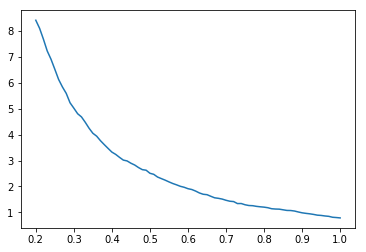

lr 0.17
depth 3
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.464385582854698


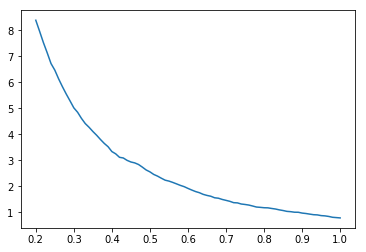

lr 0.18000000000000002
depth 3
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.399733375618774


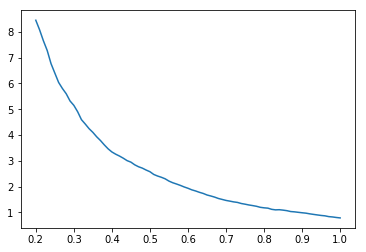

lr 0.19000000000000003
depth 3
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.483313659919854


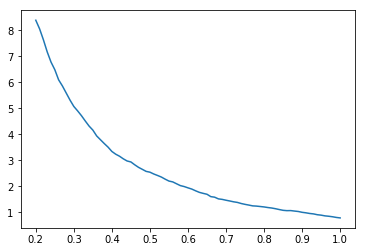

lr 0.20000000000000004
depth 3
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.389622152126159


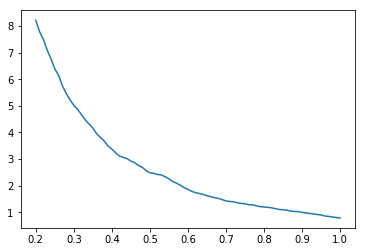

lr 0.21000000000000005
depth 3
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.451869436810453


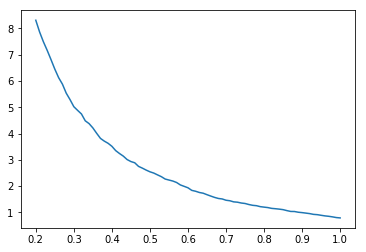

lr 0.22000000000000006
depth 3
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.580550428959506


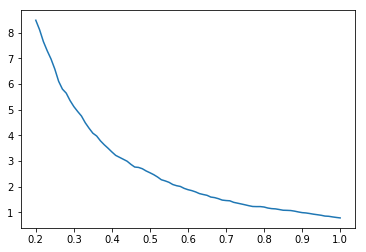

lr 0.17
depth 3
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.471128371837867


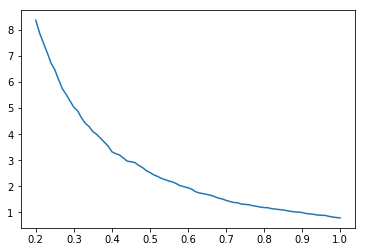

lr 0.18000000000000002
depth 3
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.3449043727196734


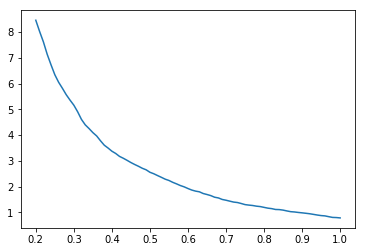

lr 0.19000000000000003
depth 3
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.449080669612162


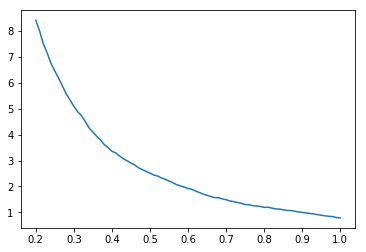

lr 0.20000000000000004
depth 3
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.429837788494486


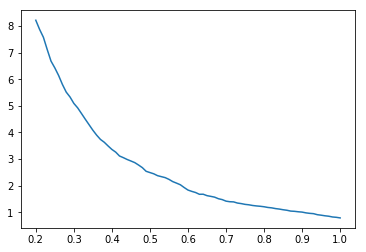

lr 0.21000000000000005
depth 3
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.43953185913724


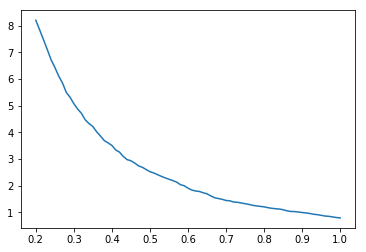

lr 0.22000000000000006
depth 3
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.591084911936634


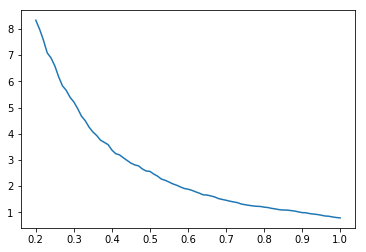

lr 0.17
depth 3
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.377776370388416


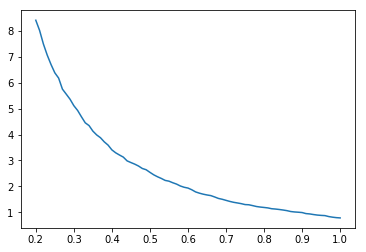

lr 0.18000000000000002
depth 3
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.387982954970228


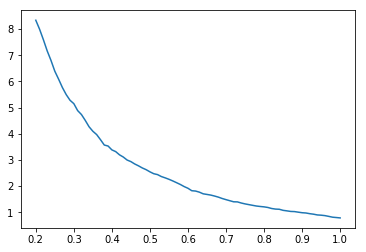

lr 0.19000000000000003
depth 3
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.412302220015268


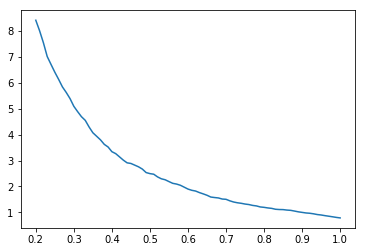

lr 0.20000000000000004
depth 3
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.480383033354853


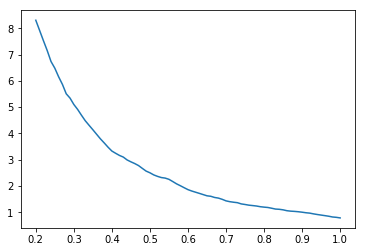

lr 0.21000000000000005
depth 3
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.517240482373546


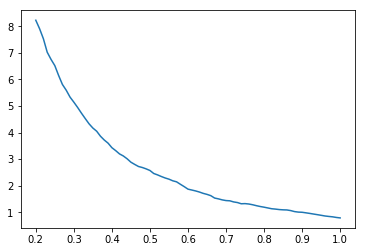

lr 0.22000000000000006
depth 3
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.593213640560055


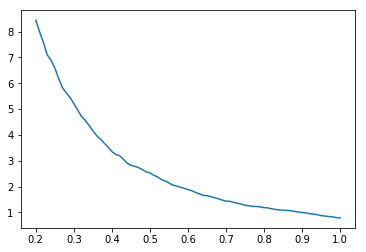

lr 0.17
depth 3
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.4454894545406285


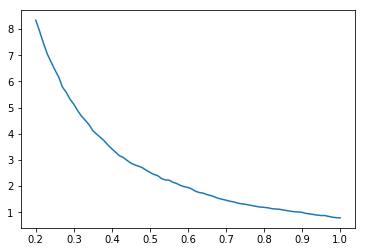

lr 0.18000000000000002
depth 3
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.414117168297703


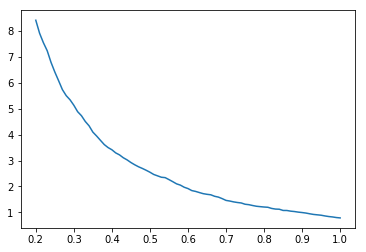

lr 0.19000000000000003
depth 3
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.422815025319176


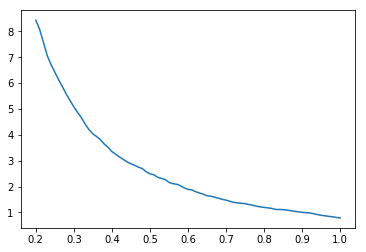

lr 0.20000000000000004
depth 3
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.354310501005705


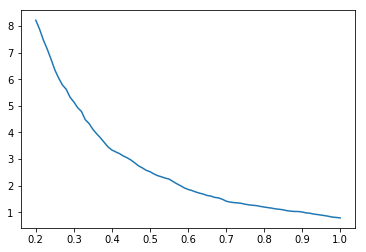

lr 0.21000000000000005
depth 3
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.402085407449628


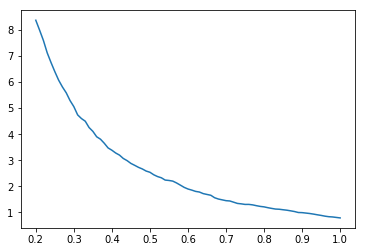

lr 0.22000000000000006
depth 3
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.562950892608891


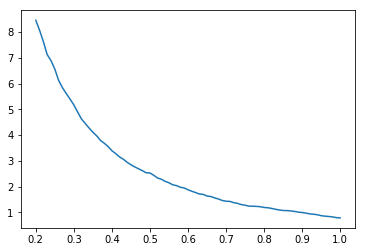

lr 0.17
depth 4
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.37980783115418


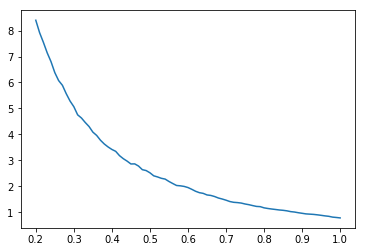

lr 0.18000000000000002
depth 4
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.4882759845816675


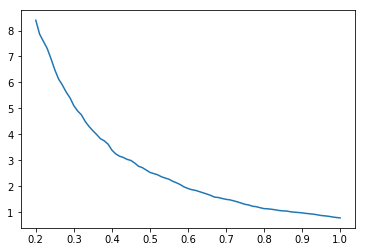

lr 0.19000000000000003
depth 4
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.467759032909723


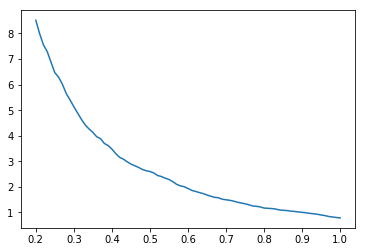

lr 0.20000000000000004
depth 4
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.39721197823922


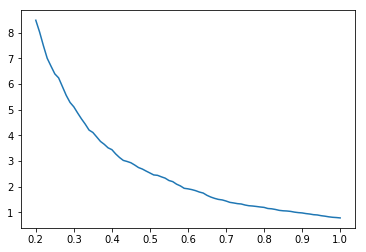

lr 0.21000000000000005
depth 4
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.482143319688991


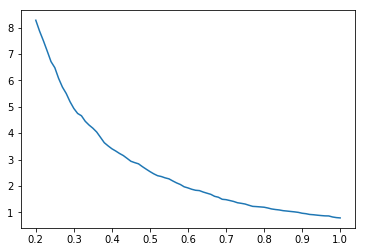

lr 0.22000000000000006
depth 4
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.366985951380213


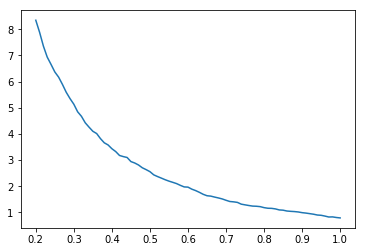

lr 0.17
depth 4
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.405560557918741


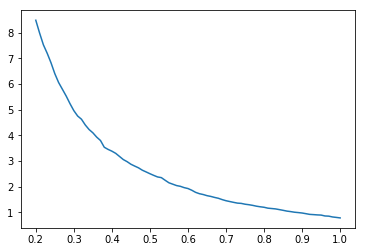

lr 0.18000000000000002
depth 4
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.448994187696133


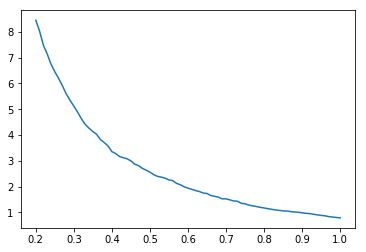

lr 0.19000000000000003
depth 4
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.488094859740123


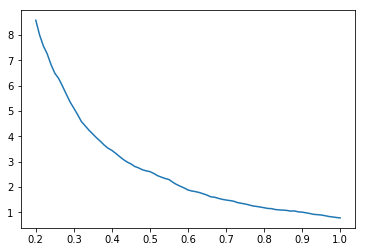

lr 0.20000000000000004
depth 4
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.42762985994966


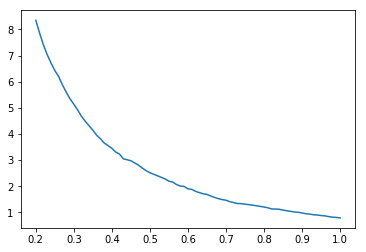

lr 0.21000000000000005
depth 4
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.379454579963878


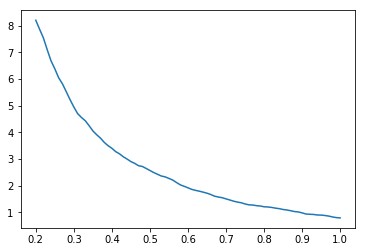

lr 0.22000000000000006
depth 4
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.342465242659262


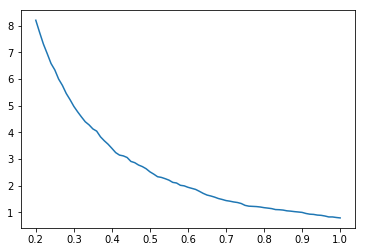

lr 0.17
depth 4
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.343090131768192


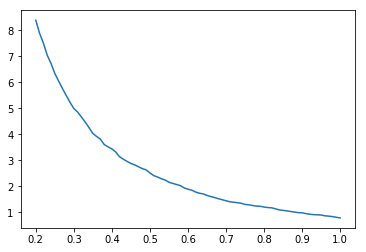

lr 0.18000000000000002
depth 4
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.421102256851505


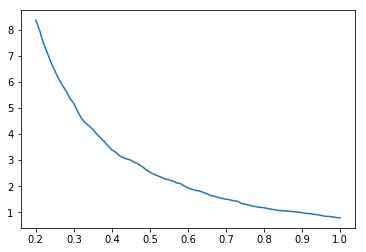

lr 0.19000000000000003
depth 4
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.519619880240402


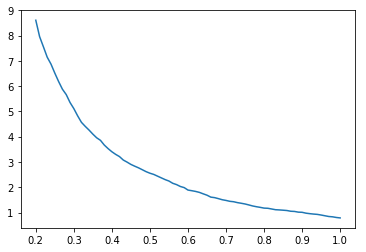

lr 0.20000000000000004
depth 4
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.417408457796883


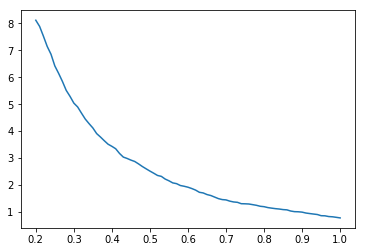

lr 0.21000000000000005
depth 4
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.374879387527082


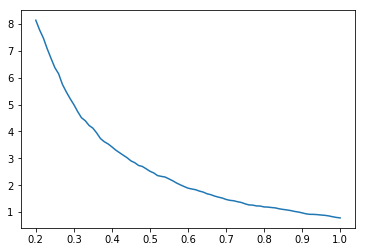

lr 0.22000000000000006
depth 4
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.284699411180849


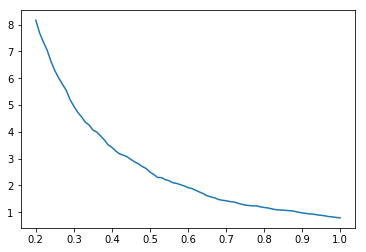

lr 0.17
depth 4
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.4009224837049485


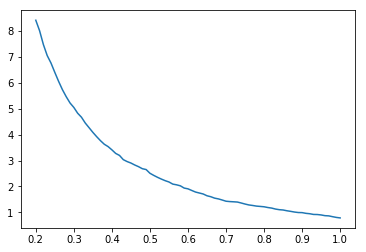

lr 0.18000000000000002
depth 4
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.361725218282779


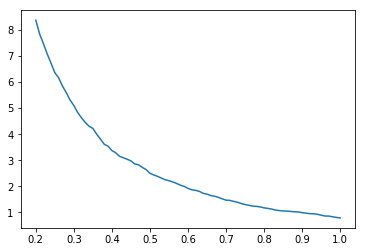

lr 0.19000000000000003
depth 4
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.554426594184881


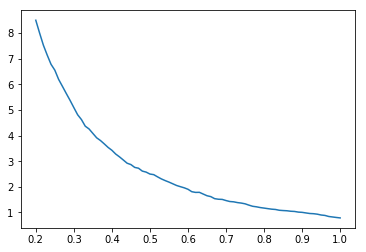

lr 0.20000000000000004
depth 4
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.402815036191701


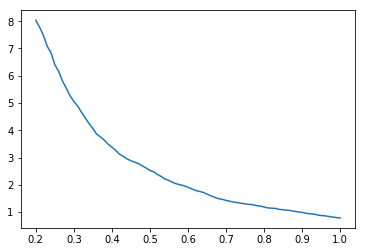

lr 0.21000000000000005
depth 4
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.334378395652893


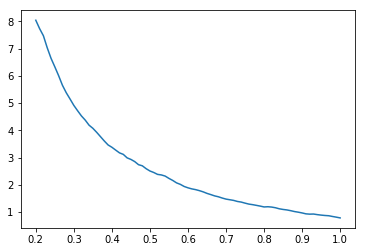

lr 0.22000000000000006
depth 4
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.29484202056392


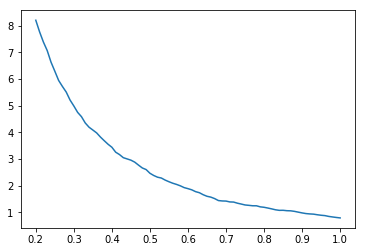

lr 0.17
depth 4
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.326962211203405


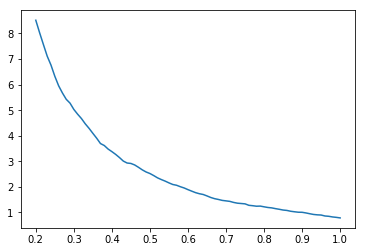

lr 0.18000000000000002
depth 4
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.440859011590455


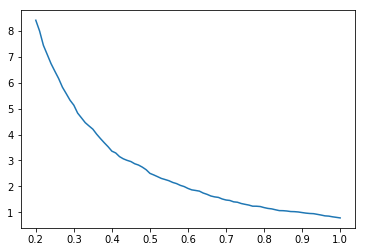

lr 0.19000000000000003
depth 4
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.573621116762124


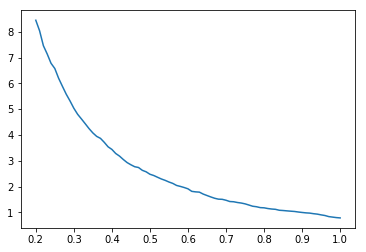

lr 0.20000000000000004
depth 4
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.552668601855643


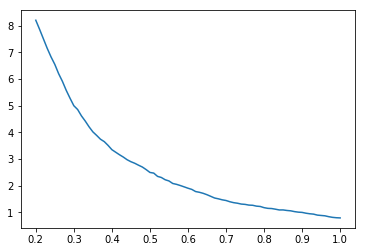

lr 0.21000000000000005
depth 4
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.267732173233983


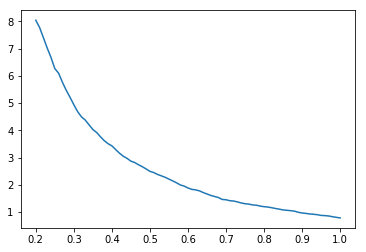

lr 0.22000000000000006
depth 4
n_features 24


/anaconda/envs/azureml_py36_automl/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning:

It is recommended to use this approach on treatment balanced data. Current sample size is unbalanced.



Submit data shape: (206109, 1)

score  6.284732131280024


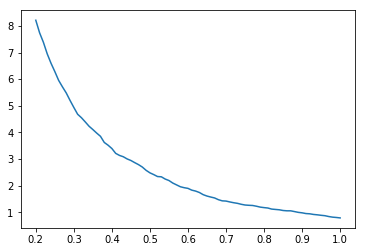

In [9]:
import numpy as np
from tqdm import tqdm
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


# list of numbers from 0 to 1.0 with a 0.05 interval
lrs = list(np.arange(0.17, 0.23, 0.01))
depth = [3, 4]
num_features = [24]
num_estimators = list(np.arange(80, 180, 20))

# try a bunch of alpha values in a Linear Regression (Ridge) model
experiment = Experiment(workspace=ws, name="cycling_features_24")
max_score = 0
for max_depth in depth:
    for n_features in num_features:
        for n_estimators in num_estimators:
            for lr in lrs:
                print('lr', lr)
                print('depth', max_depth)
                print('n_features', n_features)

                with experiment.start_logging(snapshot_directory=None) as run:
                    run.log(name='lr', value=lr)
                    run.log(name='depth', value=max_depth)
                    run.log(name='n_features', value=n_features)
                    run.log(name='n_estimators', value=n_estimators)

                    xgb_est_params = {
                        'max_depth':max_depth,
                        'learning_rate': lr, 
                        'n_estimators': n_estimators,
                        'nthread':64,
                        'n_gpus':1,
                        'seed':42
                    }

                    estimator = XGBClassifier(
                        **xgb_est_params
                    )


                    uplift_model_cl_tr = ClassTransformation(
                        estimator=estimator
                    )

                    X_train_tmp = X_train.drop(columns=['group', 'response_att']).filter(features_list[2:n_features + 2])
                    X_test_tmp = X_test.drop(columns=['group', 'response_att']).filter(features_list[2:n_features + 2])

                    uplift_model_cl_tr.fit(
                        X=X_train_tmp,
                        y=X_train['response_att'],
                        treatment=X_train['group']
                    )

                    uplift_ts = uplift_model_cl_tr.predict(
                        X_test_tmp
                    )

                    df_submit = X_test_tmp.assign(uplift=uplift_ts)[['uplift']]

                    print(f'Submit data shape: {df_submit.shape}\n')
                    df_submit.head(2)

                    df_submit['group'] = X_test['group']
                    df_submit['response_att'] = X_test['response_att']
                    score = custom_metric(df_submit)
                    print('score ', score)
                    if score > max_score:
                        max_score = score
                        run.tag('Good')
                    run.log(name='score', value=score)
        
        #joblib.dump(value=uplift_model_cl_tr, filename='outputs/model' + str(i) + '.pkl')
        #i += 1

In [11]:
runs = {}
run_metrics = {}

# Create dictionaries containing the runs and the metrics for all runs containing the 'mse' metric
for r in tqdm(experiment.get_runs()):
    metrics = r.get_metrics()
    if 'score' in metrics.keys():
        runs[r.id] = r
        run_metrics[r.id] = metrics

# Find the run with the best (lowest) mean squared error and display the id and metrics
best_run_id = max(run_metrics, key = lambda k: run_metrics[k]['score'])
best_run = runs[best_run_id]
print('Best run is:', best_run_id)
print('Metrics:', run_metrics[best_run_id])

# Tag the best run for identification later
best_run.tag("Best Run")

22it [00:05,  4.05it/s]


Best run is: fb524d86-f5f6-4a3d-a3cb-4e8d66e11f6a
Metrics: {'lr': 0.2, 'score': 6.087121555088201}
